# Loan Approval Prediction and Analysis

The objective of this project is to predict loan approval outcomes using data analysis and machine learning. It involves exploring key features, handling missing values and imbalances, and applying models to classify loan applications. The goal is to build an accurate model, optimizing for metrics like F1 score to address class imbalance.

In [68]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ArchanaAnalytics/DS-Portfolio/refs/heads/main/Datasets/loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 13)

# Exploratory Data Analysis (EDA)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Categorical Variables

In [ ]:
df['Loan_ID'].nunique()

614

<Axes: >

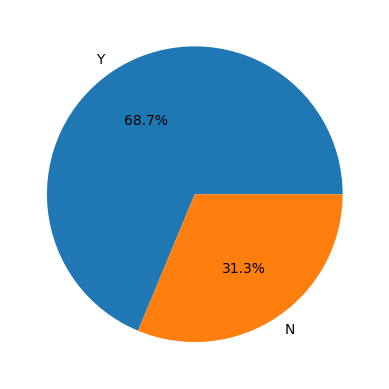

In [ ]:
df['Loan_Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', ylabel='')

In [ ]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [ ]:
df['Credit_History'].dropna().unique()      # 1 - Good credit score  ; 0 - Bad credit score

array([1., 0.])

In [ ]:
categorical_columns = df.select_dtypes(include='O').columns.to_list()
categorical_columns.remove('Loan_ID')
categorical_columns.extend(['Loan_Amount_Term', 'Credit_History'])
print(categorical_columns)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Loan_Amount_Term', 'Credit_History']


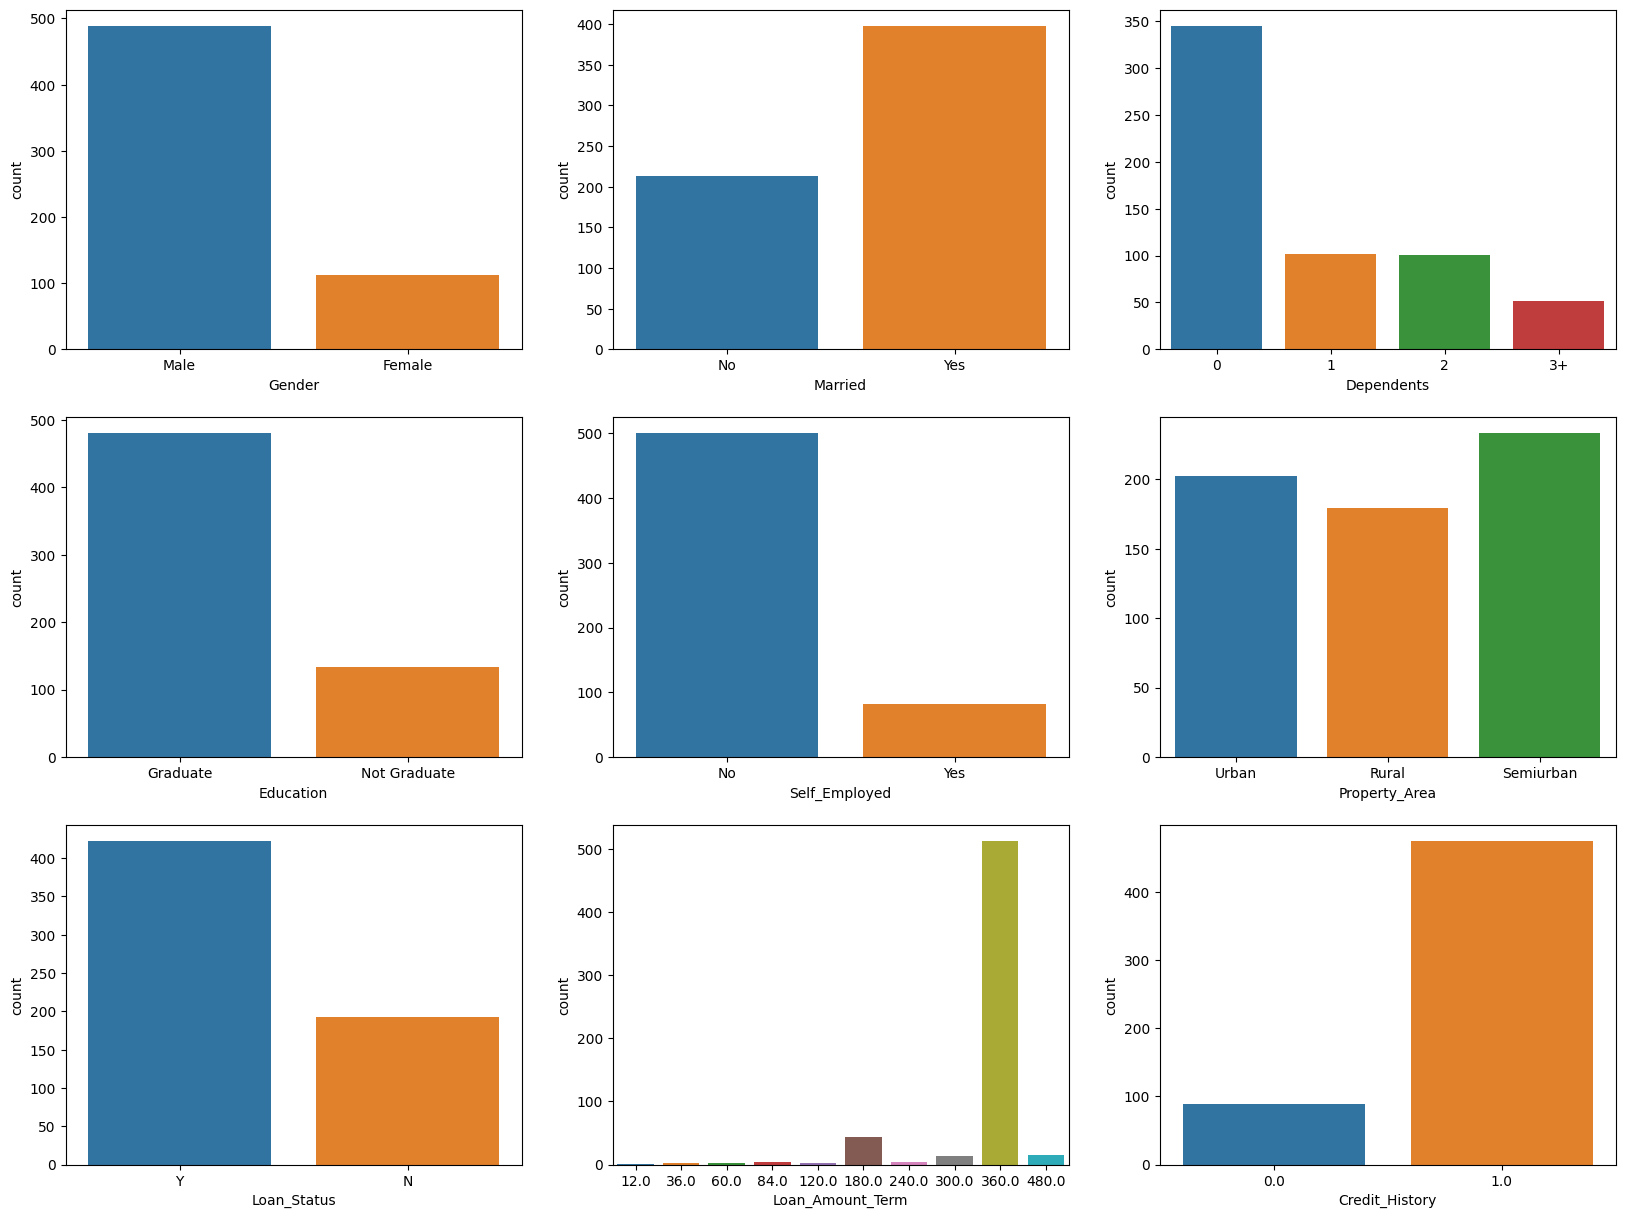

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,15))
for col, subplot in zip(categorical_columns, axes.flatten()):
    sns.countplot(x=df[col], ax=subplot)
plt.show()

# Numerical Variables

In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
df[numerical_cols].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


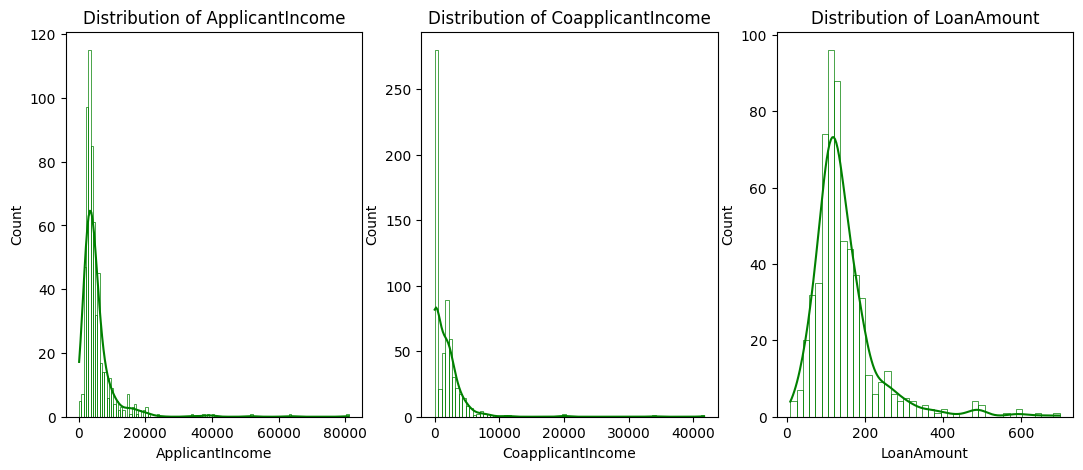

In [ ]:
fig, axes = plt.subplots(ncols=3, figsize=(13,5))
for index, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, kde=True, color='green', fill=False, ax=axes[index]).set(title='Distribution of '+col)
plt.show()

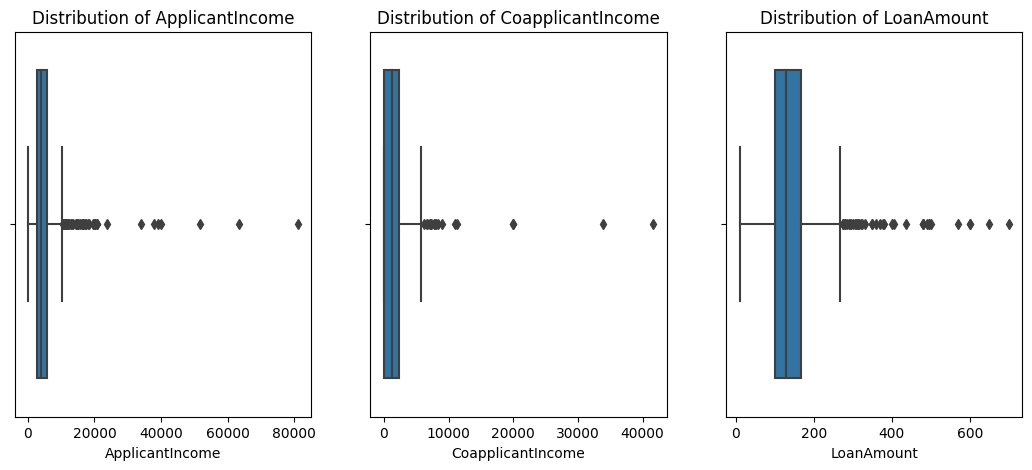

In [ ]:
fig, axes = plt.subplots(ncols=3, figsize=(13,5))
for index, col in enumerate(numerical_cols):
    sns.boxplot(data=df, x=col, ax=axes[index]).set(title='Distribution of '+col)
plt.show()

### Multivariate analysis

<Axes: >

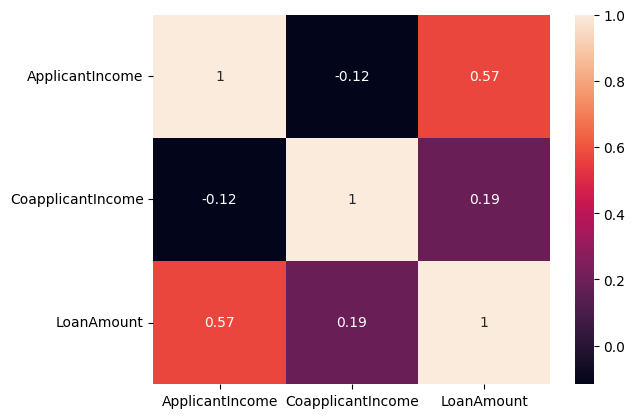

In [ ]:
sns.heatmap(df[numerical_cols].corr(), annot=True)

###Bivariate Analysis

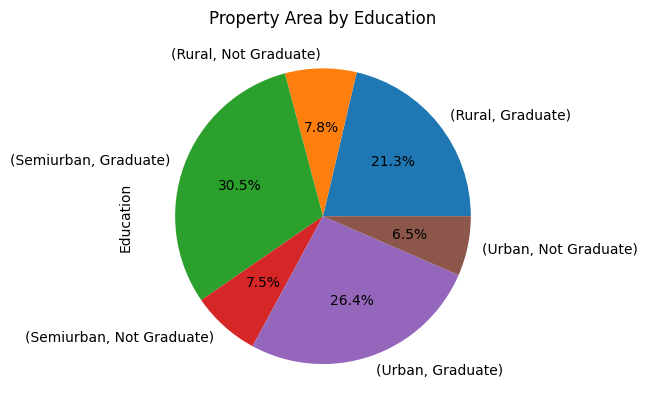

In [ ]:
df.groupby('Property_Area').Education.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Property Area by Education')
plt.show()

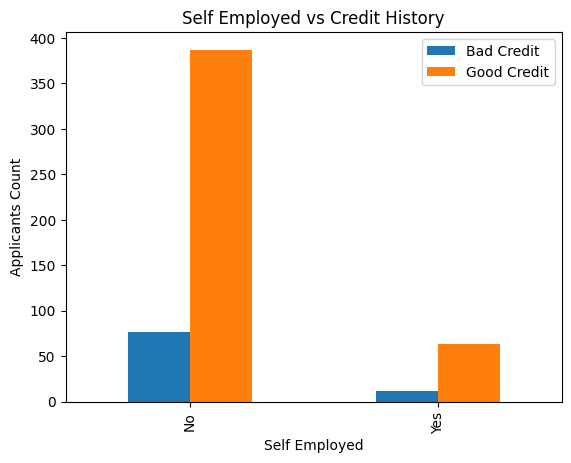

In [ ]:
pd.crosstab(df['Self_Employed'], df['Credit_History']).plot.bar()
plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Applicants Count')
plt.legend(['Bad Credit', 'Good Credit'])
plt.show()

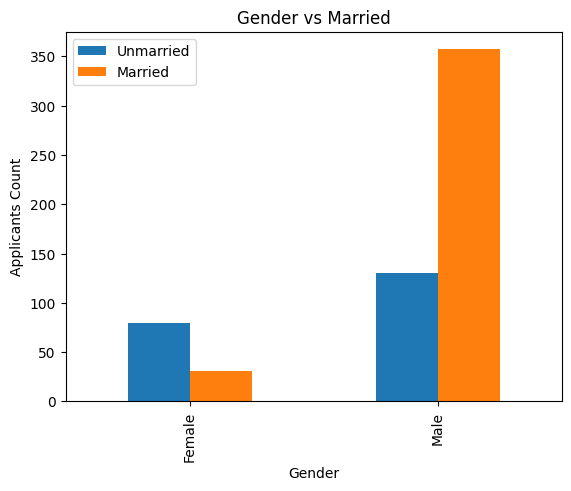

In [ ]:
pd.crosstab(df['Gender'],df['Married']).plot.bar()
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Applicants Count')
plt.legend(['Unmarried', 'Married'])
plt.show()

In [ ]:
df.groupby('Education')['LoanAmount'].describe()

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Graduate,465.0,154.060215,92.883366,9.0,103.0,132.0,176.0,700.0
Not Graduate,127.0,118.409449,39.773636,25.0,96.5,115.0,133.0,279.0


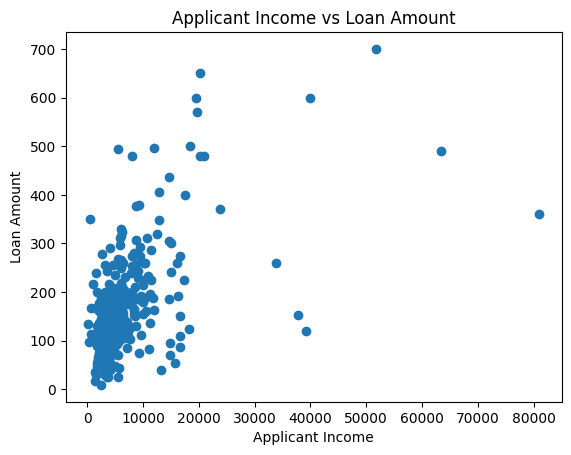

In [ ]:
plt.scatter(df['ApplicantIncome'], df['LoanAmount'])
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('Applicant Income vs Loan Amount')
plt.show()

<Axes: xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

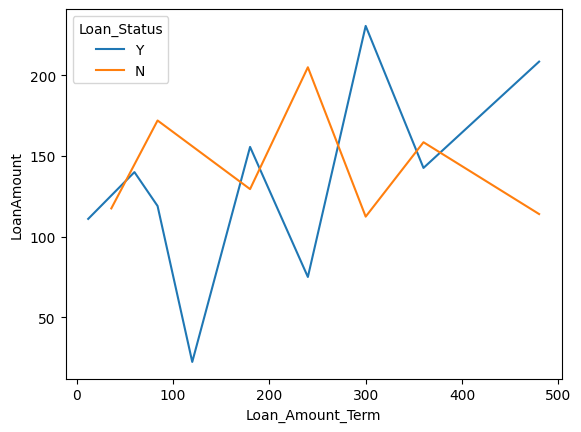

In [ ]:
sns.lineplot(x=df['Loan_Amount_Term'], y=df['LoanAmount'], hue=df['Loan_Status'], errorbar=None)

# Data Preprocessing
## Data Cleaning

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Imputation

In [69]:
# Impute `Gender` and `Married` with their respective mode
cols_mode = ['Gender', 'Married']

for col in cols_mode:
    df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
df.groupby('Married')['Dependents'].first()

,Dependents
Married,
No,0
Yes,1


In [70]:
# Impute 'Dependents' based on 'Married'
df['Dependents'] = df.groupby('Married')['Dependents'].transform(lambda x: x.fillna(x.iloc[0]))

In [ ]:
# Median Applicant income by self-employment status
median_income = df.groupby('Self_Employed')['ApplicantIncome'].median()
median_income

,ApplicantIncome
Self_Employed,
No,3705.5
Yes,5809.0


In [71]:
# Impute 'Self_Employed' based on 'ApplicantIncome'
df['Self_Employed'] = df.apply(
    lambda row: 'Yes' if row['ApplicantIncome'] > median_income['Yes'] else 'No', axis=1
)

In [72]:
from sklearn.impute import KNNImputer

# Select features for KNN imputation (including correlated ones that are likely to help in imputation)
features_for_KNNimputation = ['LoanAmount', 'Loan_Amount_Term', 'ApplicantIncome', 'CoapplicantIncome', 'Credit_History']

# Apply KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform')
imputed_data = knn_imputer.fit_transform(df[features_for_KNNimputation])

# Replace imputed values in the original dataset
df[features_for_KNNimputation] = imputed_data

In [73]:
# Impute 'Credit_History' based on 'Loan_Status'
df['Credit_History'] = df.groupby('Loan_Status')['Credit_History'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df['Credit_History'].mode()[0])
)

In [ ]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64


###Check for outliers

<Axes: xlabel='LoanAmount'>

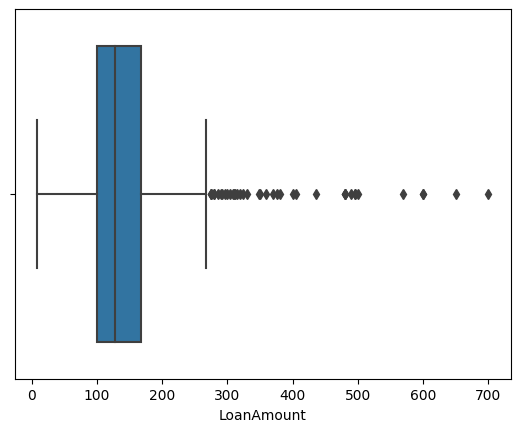

In [ ]:
sns.boxplot(x=df['LoanAmount'])

###Remove outliers

In [ ]:
print(numerical_cols)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


In [ ]:
n = numerical_cols.copy()

Q1 = df[n].quantile(0.25)
Q3 = df[n].quantile(0.75)
IQR = Q3 - Q1

df[n] = df[n][(df[n] >= (Q1-1.5*IQR)) & (df[n] <= (Q3+1.5*IQR))]

<Axes: xlabel='LoanAmount'>

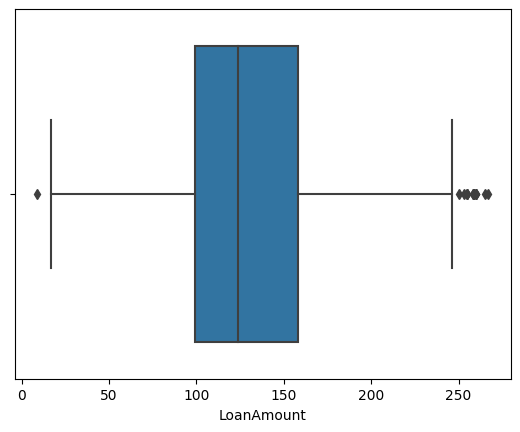

In [ ]:
sns.boxplot(x=df['LoanAmount'])

In [51]:
df[numerical_cols].skew()

,0
ApplicantIncome,1.065673
CoapplicantIncome,0.916837
LoanAmount,0.496285


###Square root transformation to treat Skewed data

In [48]:
df1 = df.copy()
for col in numerical_cols:
    df1[col] = (df1[col])**(1/2)

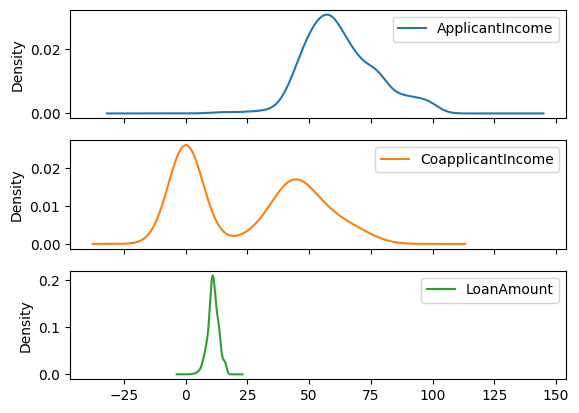

In [49]:
df1[numerical_cols].plot(kind='kde', subplots=True)
plt.show()

In [50]:
df1[numerical_cols].skew()

,0
ApplicantIncome,0.406253
CoapplicantIncome,0.180436
LoanAmount,-0.173647


# Feature Selection

In [75]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,Yes,5849.0,0.0,147.8,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,No,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,Yes,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [76]:
# Select features and target
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = df['Loan_Status']

In [77]:
x_obj_cols = X.select_dtypes(include='O').columns
x_obj_cols

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')

# Feature engineering

In [78]:
# handle cantegorical features
from sklearn.preprocessing import LabelEncoder

X[x_obj_cols] = X[x_obj_cols].apply(LabelEncoder().fit_transform)
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,1,5849.0,0.0,147.8,360.0,1.0,2
1,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,0,3000.0,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,1,6000.0,0.0,141.0,360.0,1.0,2


In [ ]:
X.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
dtype: object

In [79]:
X['Credit_History'] = X['Credit_History'].astype(int)
X.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,1,5849.0,0.0,147.8,360.0,1,2
1,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1,0
2,1,1,0,0,0,3000.0,0.0,66.0,360.0,1,2


## Split data into training and testing

In [110]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=36, stratify=y)

# Feature Scaling

In [59]:
print(numerical_cols)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


In [111]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [112]:
X.sample(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
423,1,1,1,0,1,0.302510,0.015649,-0.425327,348.0,0,2
16,1,0,1,1,0,-0.296107,-0.554487,-0.542405,240.0,0,2
550,1,1,2,0,1,0.201430,-0.554487,-0.031947,360.0,0,0


# Build the ML model

In [91]:
import warnings
warnings.filterwarnings("ignore")

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

models = [LogisticRegression(), GaussianNB(), DecisionTreeClassifier(max_depth=4), RandomForestClassifier(), KNeighborsClassifier()]

In [114]:
for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, pos_label='Y')
    print(f"{model.__class__.__name__:24}: F1 Score = {f1:.3f}, Accuracy = {accuracy:.3f}")

LogisticRegression      : F1 Score = 0.867, Accuracy = 0.805
GaussianNB              : F1 Score = 0.839, Accuracy = 0.773
DecisionTreeClassifier  : F1 Score = 0.856, Accuracy = 0.792
RandomForestClassifier  : F1 Score = 0.837, Accuracy = 0.773
KNeighborsClassifier    : F1 Score = 0.775, Accuracy = 0.669


Since the dataset is **imbalanced**, accuracy may not be the best metric. The **F1 score** is more reliable in such cases, as it balances precision and recall, especially when one class is underrepresented.

For this dataset, **LogisticRegression** is the best performing model based on the F1 score, providing the best balance between precision and recall.

In [115]:
clf = LogisticRegression()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

In [116]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.76      0.54      0.63        48
           Y       0.82      0.92      0.87       106

    accuracy                           0.81       154
   macro avg       0.79      0.73      0.75       154
weighted avg       0.80      0.81      0.79       154



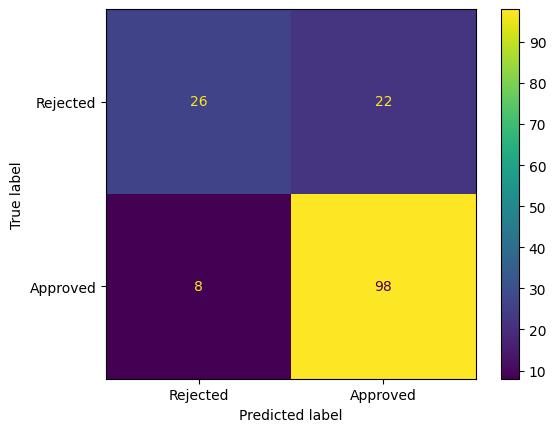

In [117]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=['Rejected', 'Approved']).plot()
plt.show()